In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from scipy.stats import zscore
from scipy.stats import zscore
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Flatten,BatchNormalization,Conv1D,Dense,Dropout,Input,Concatenate,GlobalMaxPooling1D,MaxPooling1D,AveragePooling1D,Activation

Using TensorFlow backend.


In [18]:
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,1]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')

s = []
for i in signal: 
    s.append(i)
signal = np.array(s)
signal = np.reshape(signal, (3961,200,1))
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(classes)
encoded_Y = encoder.transform(classes)
train_y = np_utils.to_categorical(encoded_Y)
trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, train_y, test_size=0.1, random_state=42)

In [5]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=5, verbose=2,callbacks=[estp])

Epoch 1/70
713/713 - 3s - loss: 1.4471 - accuracy: 0.5469
Epoch 2/70
713/713 - 3s - loss: 0.6086 - accuracy: 0.7682
Epoch 3/70
713/713 - 3s - loss: 0.4357 - accuracy: 0.8443
Epoch 4/70
713/713 - 3s - loss: 0.3388 - accuracy: 0.8822
Epoch 5/70
713/713 - 3s - loss: 0.2656 - accuracy: 0.9082
Epoch 6/70
713/713 - 3s - loss: 0.2301 - accuracy: 0.9130
Epoch 7/70
713/713 - 3s - loss: 0.1978 - accuracy: 0.9287
Epoch 8/70
713/713 - 3s - loss: 0.1703 - accuracy: 0.9341
Epoch 9/70
713/713 - 3s - loss: 0.1635 - accuracy: 0.9383
Epoch 10/70
713/713 - 3s - loss: 0.1521 - accuracy: 0.9400
Epoch 11/70
713/713 - 3s - loss: 0.1368 - accuracy: 0.9470
Epoch 12/70
713/713 - 3s - loss: 0.1197 - accuracy: 0.9554
Epoch 13/70
713/713 - 3s - loss: 0.1137 - accuracy: 0.9554
Epoch 14/70
713/713 - 3s - loss: 0.1004 - accuracy: 0.9627
Epoch 15/70
713/713 - 2s - loss: 0.0967 - accuracy: 0.9655
Epoch 16/70
713/713 - 2s - loss: 0.0825 - accuracy: 0.9705
Epoch 17/70
713/713 - 3s - loss: 0.0896 - accuracy: 0.9663
Epoch 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       1.00      1.00      1.00        15
           2       0.75      1.00      0.86         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      0.70      0.82        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       0.96      1.00      0.98        23
          10       1.00      1.00      1.00        38
          11       1.00      0.91      0.96        35
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        32

   micro avg       0.97      0.97      0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.98   

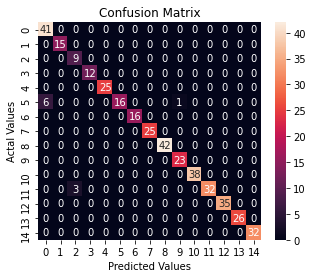

In [10]:
pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [16]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=10, verbose=2,callbacks=[estp])

Epoch 1/70
357/357 - 1s - loss: 1.7485 - accuracy: 0.4784
Epoch 2/70
357/357 - 1s - loss: 0.6862 - accuracy: 0.7652
Epoch 3/70
357/357 - 1s - loss: 0.4412 - accuracy: 0.8547
Epoch 4/70
357/357 - 1s - loss: 0.3288 - accuracy: 0.8965
Epoch 5/70
357/357 - 1s - loss: 0.2646 - accuracy: 0.9133
Epoch 6/70
357/357 - 1s - loss: 0.2140 - accuracy: 0.9293
Epoch 7/70
357/357 - 1s - loss: 0.1837 - accuracy: 0.9383
Epoch 8/70
357/357 - 1s - loss: 0.1666 - accuracy: 0.9430
Epoch 9/70
357/357 - 1s - loss: 0.1553 - accuracy: 0.9478
Epoch 10/70
357/357 - 1s - loss: 0.1193 - accuracy: 0.9607
Epoch 11/70
357/357 - 1s - loss: 0.1113 - accuracy: 0.9677
Epoch 12/70
357/357 - 1s - loss: 0.0988 - accuracy: 0.9703
Epoch 13/70
357/357 - 1s - loss: 0.0846 - accuracy: 0.9753
Epoch 14/70
357/357 - 1s - loss: 0.0920 - accuracy: 0.9669
Epoch 15/70
357/357 - 2s - loss: 0.0811 - accuracy: 0.9750
Epoch 16/70
357/357 - 1s - loss: 0.0724 - accuracy: 0.9767
Epoch 17/70
357/357 - 1s - loss: 0.0627 - accuracy: 0.9804
Epoch 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      0.96      0.98        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       0.96      1.00      0.98        23
          10       1.00      0.97      0.99        38
          11       1.00      1.00      1.00        35
          12       1.00      1.00      1.00        35
          13       0.96      1.00      0.98        26
          14       1.00      1.00      1.00        32

   micro avg       0.99      0.99      0.99       397
   macro avg       0.99      1.00      0.99       397
weighted avg       1.00   

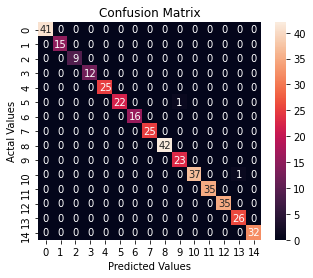

In [17]:
pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [3]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=20, verbose=2,callbacks=[estp])

Epoch 1/70
179/179 - 1s - loss: 2.0917 - accuracy: 0.3605
Epoch 2/70
179/179 - 1s - loss: 0.9498 - accuracy: 0.7090
Epoch 3/70
179/179 - 1s - loss: 0.5871 - accuracy: 0.8114
Epoch 4/70
179/179 - 1s - loss: 0.4395 - accuracy: 0.8631
Epoch 5/70
179/179 - 1s - loss: 0.3481 - accuracy: 0.8937
Epoch 6/70
179/179 - 1s - loss: 0.2837 - accuracy: 0.9206
Epoch 7/70
179/179 - 1s - loss: 0.2329 - accuracy: 0.9355
Epoch 8/70
179/179 - 1s - loss: 0.2015 - accuracy: 0.9400
Epoch 9/70
179/179 - 1s - loss: 0.1821 - accuracy: 0.9428
Epoch 10/70
179/179 - 1s - loss: 0.1668 - accuracy: 0.9473
Epoch 11/70
179/179 - 1s - loss: 0.1446 - accuracy: 0.9568
Epoch 12/70
179/179 - 1s - loss: 0.1302 - accuracy: 0.9624
Epoch 13/70
179/179 - 1s - loss: 0.1233 - accuracy: 0.9675
Epoch 14/70
179/179 - 1s - loss: 0.1123 - accuracy: 0.9652
Epoch 15/70
179/179 - 1s - loss: 0.0982 - accuracy: 0.9725
Epoch 16/70
179/179 - 1s - loss: 0.0829 - accuracy: 0.9778
Epoch 17/70
179/179 - 1s - loss: 0.0902 - accuracy: 0.9739
Epoch 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      0.91      0.95        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       0.92      1.00      0.96        23
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        35
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        32

   micro avg       0.99      0.99      0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       1.00   

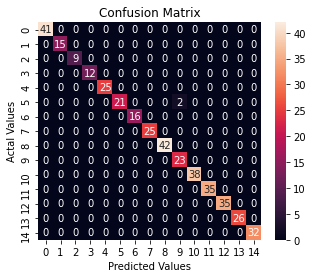

In [4]:
pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [20]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=40, verbose=2,callbacks=[estp])

Epoch 1/70
90/90 - 0s - loss: 2.2804 - accuracy: 0.2960
Epoch 2/70
90/90 - 0s - loss: 1.3492 - accuracy: 0.6075
Epoch 3/70
90/90 - 0s - loss: 0.8334 - accuracy: 0.7427
Epoch 4/70
90/90 - 0s - loss: 0.6594 - accuracy: 0.7682
Epoch 5/70
90/90 - 0s - loss: 0.5332 - accuracy: 0.8190
Epoch 6/70
90/90 - 0s - loss: 0.4595 - accuracy: 0.8460
Epoch 7/70
90/90 - 0s - loss: 0.4083 - accuracy: 0.8673
Epoch 8/70
90/90 - 0s - loss: 0.3623 - accuracy: 0.8850
Epoch 9/70
90/90 - 0s - loss: 0.3183 - accuracy: 0.9066
Epoch 10/70
90/90 - 0s - loss: 0.2879 - accuracy: 0.9127
Epoch 11/70
90/90 - 0s - loss: 0.2544 - accuracy: 0.9290
Epoch 12/70
90/90 - 0s - loss: 0.2330 - accuracy: 0.9324
Epoch 13/70
90/90 - 0s - loss: 0.2254 - accuracy: 0.9357
Epoch 14/70
90/90 - 0s - loss: 0.2034 - accuracy: 0.9439
Epoch 15/70
90/90 - 0s - loss: 0.1786 - accuracy: 0.9520
Epoch 16/70
90/90 - 0s - loss: 0.1627 - accuracy: 0.9545
Epoch 17/70
90/90 - 0s - loss: 0.1506 - accuracy: 0.9593
Epoch 18/70
90/90 - 0s - loss: 0.1445 - 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      1.00      1.00        15
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      0.78      0.88        23
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        42
           9       1.00      1.00      1.00        23
          10       1.00      0.97      0.99        38
          11       1.00      0.97      0.99        35
          12       1.00      1.00      1.00        35
          13       0.96      1.00      0.98        26
          14       1.00      1.00      1.00        32

   micro avg       0.99      0.98      0.98       397
   macro avg       0.99      0.98      0.98       397
weighted avg       0.99   

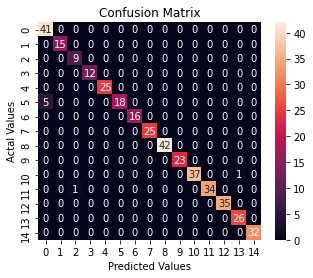

In [21]:
pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [22]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 198, 32)           128       
_________________________________________________________________
average_pooling1d_12 (Averag (None, 99, 32)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 97, 32)            3104      
_________________________________________________________________
average_pooling1d_13 (Averag (None, 48, 32)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               153700    
_________________________________________________________________
dense_19 (Dense)             (None, 500)              

In [23]:
#learning rate


Epoch 1/70
179/179 - 1s - loss: 1.0428 - accuracy: 0.6131
Epoch 2/70
179/179 - 1s - loss: 0.4046 - accuracy: 0.8476
Epoch 3/70
179/179 - 1s - loss: 0.2310 - accuracy: 0.9127
Epoch 4/70
179/179 - 1s - loss: 0.1606 - accuracy: 0.9397
Epoch 5/70
179/179 - 1s - loss: 0.0970 - accuracy: 0.9658
Epoch 6/70
179/179 - 1s - loss: 0.0670 - accuracy: 0.9764
Epoch 7/70
179/179 - 1s - loss: 0.0476 - accuracy: 0.9871
Epoch 8/70
179/179 - 1s - loss: 0.0903 - accuracy: 0.9708
Epoch 9/70
179/179 - 1s - loss: 0.0720 - accuracy: 0.9776
Epoch 10/70
179/179 - 1s - loss: 0.0261 - accuracy: 0.9919
Epoch 11/70
179/179 - 1s - loss: 0.0135 - accuracy: 0.9966
Epoch 12/70
179/179 - 1s - loss: 0.0474 - accuracy: 0.9863
Epoch 13/70
179/179 - 1s - loss: 0.0137 - accuracy: 0.9961
Epoch 14/70
179/179 - 1s - loss: 0.0150 - accuracy: 0.9964
Epoch 15/70
179/179 - 1s - loss: 0.0094 - accuracy: 0.9978
Epoch 16/70
179/179 - 1s - loss: 0.0096 - accuracy: 0.9966
Epoch 17/70
179/179 - 1s - loss: 0.0102 - accuracy: 0.9975
Epoch 

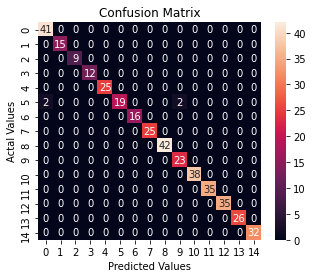

In [4]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.001)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=20, verbose=2,callbacks=[estp])


pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Epoch 1/70
179/179 - 1s - loss: 1.3123 - accuracy: 0.5432
Epoch 2/70
179/179 - 1s - loss: 0.5751 - accuracy: 0.7674
Epoch 3/70
179/179 - 1s - loss: 0.3575 - accuracy: 0.8754
Epoch 4/70
179/179 - 1s - loss: 0.2316 - accuracy: 0.9074
Epoch 5/70
179/179 - 1s - loss: 0.1888 - accuracy: 0.9327
Epoch 6/70
179/179 - 1s - loss: 0.1521 - accuracy: 0.9419
Epoch 7/70
179/179 - 1s - loss: 0.1384 - accuracy: 0.9461
Epoch 8/70
179/179 - 1s - loss: 0.1299 - accuracy: 0.9489
Epoch 9/70
179/179 - 1s - loss: 0.1011 - accuracy: 0.9604
Epoch 10/70
179/179 - 1s - loss: 0.1120 - accuracy: 0.9621
Epoch 11/70
179/179 - 1s - loss: 0.0870 - accuracy: 0.9686
Epoch 12/70
179/179 - 1s - loss: 0.0783 - accuracy: 0.9691
Epoch 13/70
179/179 - 1s - loss: 0.0939 - accuracy: 0.9686
Epoch 14/70
179/179 - 1s - loss: 0.0664 - accuracy: 0.9756
Epoch 15/70
179/179 - 1s - loss: 0.0650 - accuracy: 0.9764
Epoch 16/70
179/179 - 1s - loss: 0.0696 - accuracy: 0.9745
Epoch 17/70
179/179 - 1s - loss: 0.0719 - accuracy: 0.9745
Epoch 

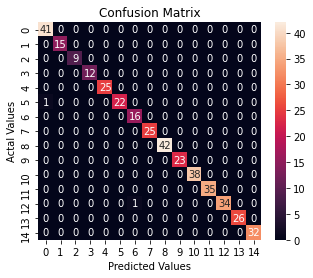

In [6]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(15, activation='softmax'))
opt = Adam(learning_rate=0.0005)
estp = EarlyStopping(monitor='loss', min_delta=0.001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=70, batch_size=20, verbose=2,callbacks=[estp])


pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print(classification_report(y_test, pred3,zero_division=0))
cm=multilabel_confusion_matrix(y_test, pred3)
yt=((np.argmax(y_test, axis=1)))
yp=((np.argmax(pred3, axis=1)))
cnf3=confusion_matrix(yt,yp)
cm_df3 = pd.DataFrame(cnf3,
                     index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], 
                     columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df3, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

AttributeError: 'Sequential' object has no attribute 'plot'

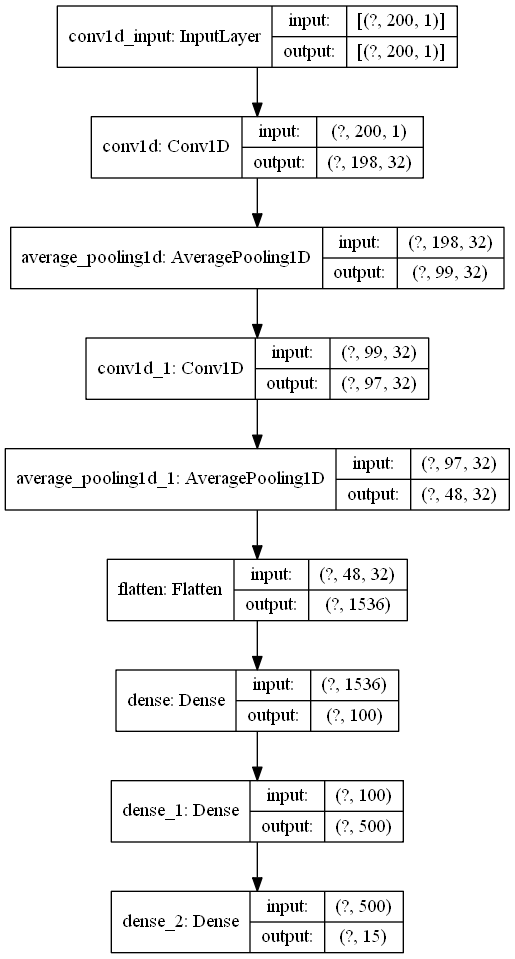

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model3, to_file='model_final.png', show_shapes=True, show_layer_names=True)

In [6]:
model3.save('model_rpi')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_rpi\assets


In [7]:
testsig=[621, 616, 406, 615, 405, 610, 408, 604, 414, 604, 416, 601, 419, 596, 425, 593, 427, 589, 434, 580, 442, 572, 450, 564, 460, 554, 466, 549, 478, 536, 484, 532, 493, 521, 501, 514, 513, 501, 525, 493, 532, 483, 542, 475, 550, 464, 557, 456, 568, 448, 575, 443, 583, 435, 586, 431, 594, 424, 598, 420, 603, 411, 609, 407, 614, 405, 613, 402, 619, 400, 617, 401, 619, 399, 618, 402, 616, 401, 618, 406, 611, 407, 605, 411, 602, 417, 601, 419, 598, 424, 593, 425, 588, 436, 579, 442, 575, 450, 564, 458, 559, 466, 547, 476, 536, 488, 529, 493, 519, 505, 512, 511, 504, 523, 490, 533, 481, 542, 471, 551, 464, 557, 456, 564, 452, 570, 442, 579, 437, 586, 428, 596, 423, 600, 418, 603, 412, 607, 408, 613, 407, 615, 402, 617, 400, 621, 400, 618, 399, 622, 402, 616, 402, 615, 405, 610, 412, 608, 411, 601, 415, 603, 419, 596, 425, 594, 426, 592, 432, 580, 441, 573, 451, 565, 456, 554, 464, 550, 477, 537, 485, 531, 493, 520, 500, 514, 513, 501, 524, 491, 529, 481, 537, 475, 546, 466, 557, 460, 563, 450]

In [11]:
sigtest = np.reshape(testsig, (1,200,1))
model3.predict(sigtest)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [50]:
from keras.models import load_model
model = tf.keras.models.load_model('model_rpi')

In [51]:
dictname = {0:'No Disturbance', 1: 'Sag', 2: 'Swell', 3: 'Interruption', 4:'Harmonic', 5:'Flicker', 6:'Transient',7:'Sag + Harmonic',8:'Swell + Harmonic',9:'Flicker + Harmonic',10:'Flicker + Sag',11:'Flicker + Swell',12:'Flicker + Transient',13:'Flicker + Sag +Harmonic',14:'Flicker +Swell + Harmonic'}

def givenum(ar):
    for i in range(len(ar)):
        if i==1:
            count=i        
        else:
            count=0
    return count

In [59]:
testsig = np.reshape(testsig, (1,200,1))
trans = MinMaxScaler((-1,1))
testsig2= np.array(testsig)
for i in range(len(testsig)):
    sigtest2[i] = trans.fit_transform(testsig[i])

In [56]:
print(dictname[givenum(model.predict(sigtest2))])

No Disturbance
